# Homework 6: Problems

### ASTROINFORMATICS
https://github.com/astromundus/astroinfo2018/blob/master/homework/HW6.ipynb


## Problem 1: Principal Component Analysis

PCA applied to 4-D data for variable stars from the SDSS and LINEAR surveys:

-- SDSS u-g and g-i colors, 

-- LINEAR variability period (logP) and variability amplitude (A).

Read the data (see below), run PCA (with four components), and then

a) to get familar with the dataset, plot g-i vs. u-g and A vs. logP diagrams

b) plot P2 vs. P1 diagram, and P3 vs. P1 diagram, and P3 vs. P4 diagram. 
Comment what insights, if any, did PCA analysis bring. 

c) plot P1 vs. g-i and P1 vs. logP diagrams; repeat with P2, P3, and P4.
Comment what insights, if any, did PCA analysis bring. 


## Problem 2: Regression and age-color relation for asteroids

We will use age and color data for asteroid families shown in figure 1 from the paper "An age–colour relationship for main-belt S-complex asteroids" by Jedicke et al. (2004, Nature 429, 275), see http://www.astro.washington.edu/users/ivezic/Publications/jedicke.pdf

Given these y(x) data (see below), with errors in both x and y, 
adapt the code introduced in 
[the last lecture](https://github.com/uw-astr-324-s17/astr-324-s17/blob/master/notebooks/Week-8-Thu.ipynb) 
by modifying the parabola (y(x) = a + b*x + c*x^2) fitter to fit instead
the following function

$$ y(x) = a + b*\left[1-exp\left(-(x/c)^d\right)\right].  $$

Important: here x is time, not log(time)! But when you plot, use log(time)
for x axis (see data below).

a) What are the the best-fit values and standard errors for 
parameters a, b, c and d? 

b) Show the marginal distributions of fitted parameters (hint: use plot_mcmc)

c) compare your best fit to the best fit from Jedicke et al. and comment

d) set all age errors to 1000 years (i.e. to 0.001 in Myr): 
do you get a different best fit? 

<br>
# Homework 1: Solutions

### Some useful definitions and functions

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from astroML.datasets import fetch_LINEAR_geneva
import pymc as pymc
%matplotlib inline

/home/olena/anaconda3/lib/python3.6/site-packages/sklearn/utils/fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


In [2]:
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)
import numpy as np
from scipy import optimize
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse
import pymc as pymc
import seaborn as sns
from astroML.linear_model import TLS_logL
from astroML.plotting.mcmc import convert_to_stdev
from astroML.datasets import fetch_hogg2010test

## Problem 1

First obtain LINEAR data for 6,146 stars using astroML built-in function: 

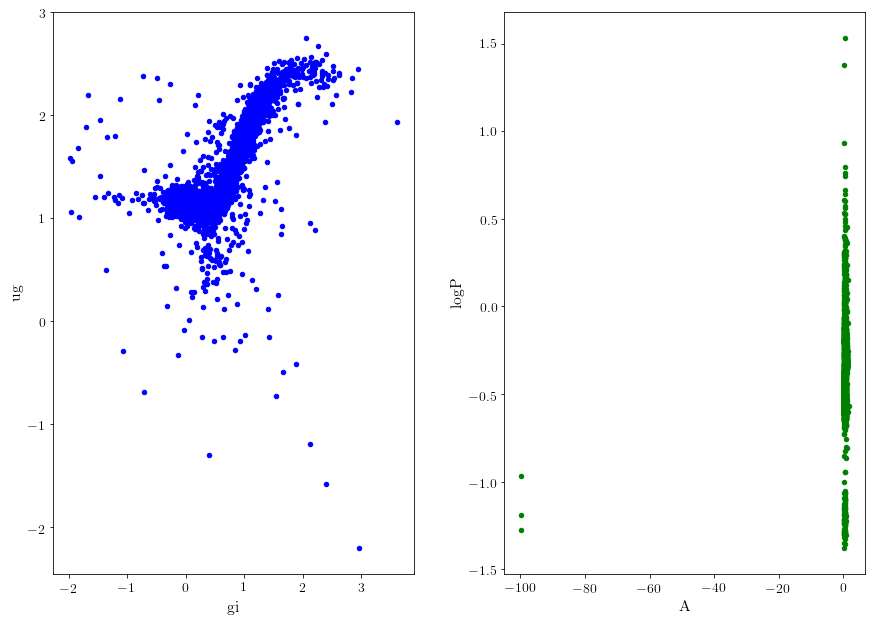

In [3]:
data = fetch_LINEAR_geneva()
# N.B. this is a 7-dimensional dataset
ug = data['ug']
gi = data['gi']
logP = data['logP']
A = data['amp']
fig0,ax0=plt.subplots(1,2,figsize=(12,10))
fig0.subplots_adjust(bottom=0.1, top=0.88,
                    left=0.01, right=0.95,
                    hspace=0.1, wspace=0.25)
ax0[0].scatter(gi, ug, s=20, color='blue')
ax0[0].set_xlabel("gi",fontsize=16)
ax0[0].set_ylabel("ug",fontsize=16)
ax0[1].scatter(A, logP, s=20, color='green')
ax0[1].set_xlabel("A",fontsize=16)
ax0[1].set_ylabel("logP",fontsize=16)
ax0[0].tick_params(axis='both', which='major', labelsize=14)
ax0[1].tick_params(axis='both', which='major', labelsize=14)

(-1, 3)

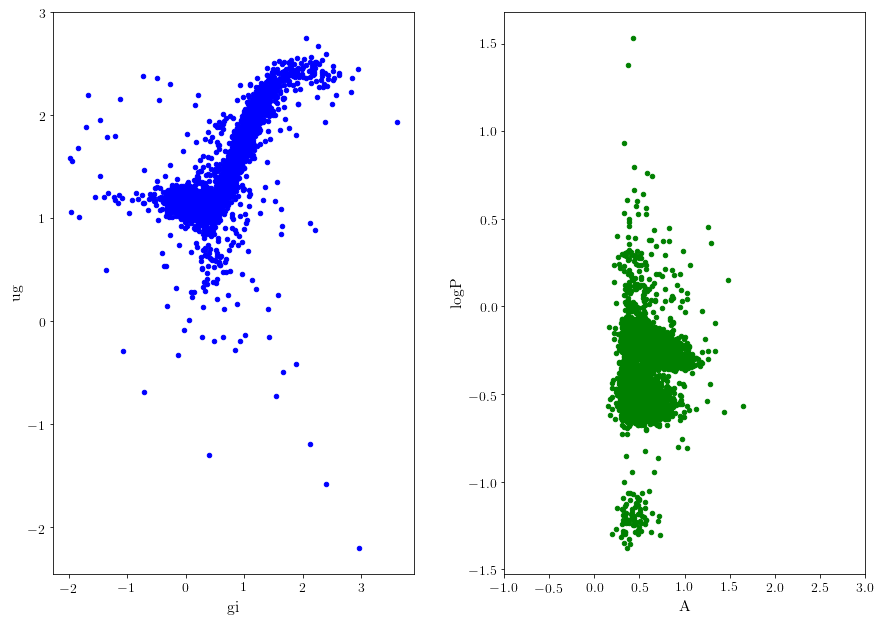

In [4]:
fig0,ax0=plt.subplots(1,2,figsize=(12,10))
fig0.subplots_adjust(bottom=0.1, top=0.88,
                    left=0.01, right=0.95,
                    hspace=0.1, wspace=0.25)
ax0[0].scatter(gi, ug, s=20, color='blue')
ax0[0].set_xlabel("gi",fontsize=16)
ax0[0].set_ylabel("ug",fontsize=16)
ax0[1].scatter(A, logP, s=20, color='green')
ax0[1].set_xlabel("A",fontsize=16)
ax0[1].set_ylabel("logP",fontsize=16)
ax0[0].tick_params(axis='both', which='major', labelsize=14)
ax0[1].tick_params(axis='both', which='major', labelsize=14)
ax0[1].set_xlim(-1,3)

Text(0, 0.5, 'P3')

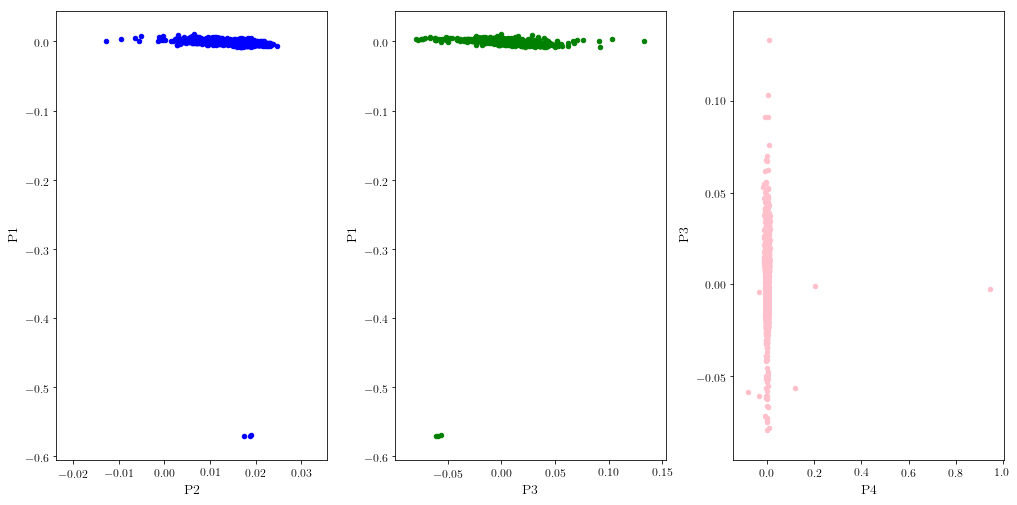

In [5]:
from sklearn.decomposition import PCA
X1=np.c_[ug, gi,logP,A]
pca=PCA(n_components=4)
pca.fit(X1.T)
pca_comp = pca.components_

fig1,ax1=plt.subplots(1,3,figsize=(14,8))
fig1.subplots_adjust(bottom=0.1, top=0.88,
                    left=0.01, right=0.95,
                    hspace=0.2, wspace=0.25)
ax1[0].scatter(pca_comp[1], pca_comp[0], s=20, color='blue')
ax1[1].scatter(pca_comp[2], pca_comp[0], s=20, color='green')
ax1[2].scatter(pca_comp[3], pca_comp[2], s=20, color='pink')
ax1[0].tick_params(axis='both', which='major', labelsize=12)
ax1[1].tick_params(axis='both', which='major', labelsize=12)
ax1[2].tick_params(axis='both', which='major', labelsize=12)
ax1[0].set_xlabel("P2",fontsize=14)
ax1[0].set_ylabel("P1",fontsize=14)
ax1[1].set_xlabel("P3",fontsize=14)
ax1[1].set_ylabel("P1",fontsize=14)
ax1[2].set_xlabel("P4",fontsize=14)
ax1[2].set_ylabel("P3",fontsize=14)

(-0.1, 0.1)

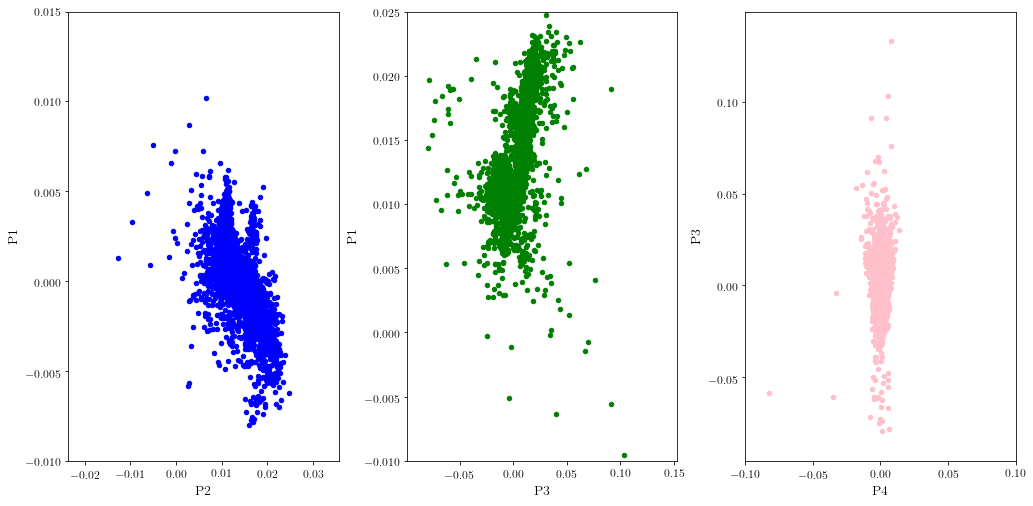

In [6]:
#setting limits to the P3 vs P1 plot and P4 vs P3 plot to look at the majority of points (excluding points that are too far)
fig1,ax1=plt.subplots(1,3,figsize=(14,8))
fig1.subplots_adjust(bottom=0.1, top=0.88,
                    left=0.01, right=0.95,
                    hspace=0.2, wspace=0.25)
ax1[0].scatter(pca_comp[1], pca_comp[0], s=20, color='blue')
ax1[1].scatter(pca_comp[2], pca_comp[1], s=20, color='green')
ax1[2].scatter(pca_comp[3], pca_comp[2], s=20, color='pink')
ax1[0].tick_params(axis='both', which='major', labelsize=12)
ax1[1].tick_params(axis='both', which='major', labelsize=12)
ax1[2].tick_params(axis='both', which='major', labelsize=12)
ax1[0].set_xlabel("P2",fontsize=14)
ax1[0].set_ylabel("P1",fontsize=14)
ax1[1].set_xlabel("P3",fontsize=14)
ax1[1].set_ylabel("P1",fontsize=14)
ax1[2].set_xlabel("P4",fontsize=14)
ax1[2].set_ylabel("P3",fontsize=14)
ax1[0].set_ylim(-0.01,0.015)
ax1[1].set_ylim(-0.01,0.025)
ax1[2].set_xlim(-0.1,0.1)

From the diagrams above we can see that there is some correlation present between some principal components, which is, however is not very strong meaning low redundancy. As can be seen, P1 component shows a little rise with decrease in P2 value and P1 has a little increase with increase in P3. At the same time component P3 has no dependence on P4, so we can predict P4 values from P3 component. There are also few dots that lie far from the main data clusters on P2 vs P1 and P3 vs P1 diagrams.

Text(0, 0.5, 'logP')

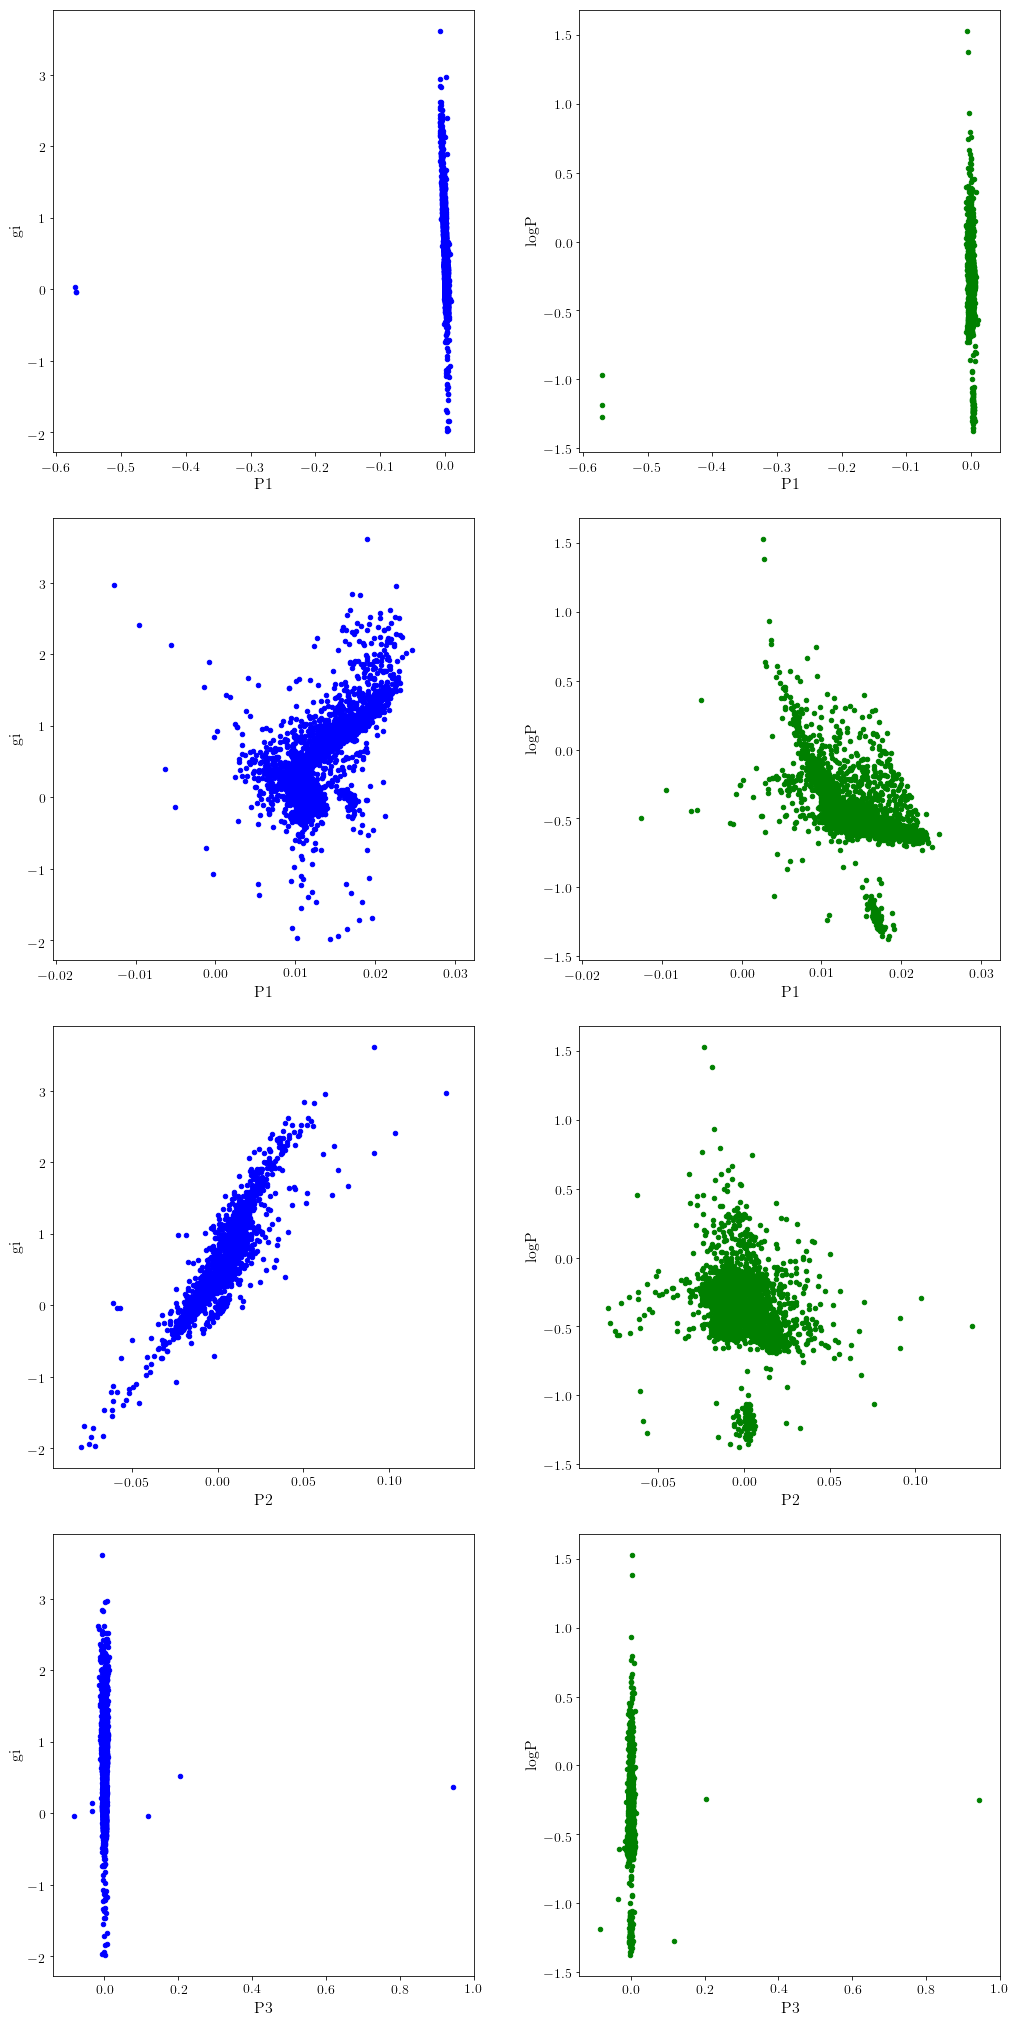

In [7]:
fig2,ax2=plt.subplots(4,2,figsize=(14,35))
fig2.subplots_adjust(bottom=0.1, top=0.88,
                    left=0.01, right=0.95,
                    hspace=0.15, wspace=0.25)
ax2[0,0].scatter(pca_comp[0], gi, s=20, color='blue')
ax2[0,1].scatter(pca_comp[0], logP, s=20, color='green')
ax2[1,0].scatter(pca_comp[1], gi, s=20, color='blue')
ax2[1,1].scatter(pca_comp[1], logP, s=20, color='green')
ax2[2,0].scatter(pca_comp[2], gi, s=20, color='blue')
ax2[2,1].scatter(pca_comp[2], logP, s=20, color='green')
ax2[3,0].scatter(pca_comp[3], gi, s=20, color='blue')
ax2[3,1].scatter(pca_comp[3], logP, s=20, color='green')
ax2[0,0].tick_params(axis='both', which='major', labelsize=14)
ax2[0,1].tick_params(axis='both', which='major', labelsize=14)
ax2[1,0].tick_params(axis='both', which='major', labelsize=14)
ax2[1,1].tick_params(axis='both', which='major', labelsize=14)
ax2[2,0].tick_params(axis='both', which='major', labelsize=14)
ax2[2,1].tick_params(axis='both', which='major', labelsize=14)
ax2[3,0].tick_params(axis='both', which='major', labelsize=14)
ax2[3,1].tick_params(axis='both', which='major', labelsize=14)
ax2[0,0].set_xlabel("P1",fontsize=16)
ax2[0,0].set_ylabel("gi",fontsize=16)
ax2[0,1].set_xlabel("P1",fontsize=16)
ax2[0,1].set_ylabel("logP",fontsize=16)
ax2[1,0].set_xlabel("P1",fontsize=16)
ax2[1,0].set_ylabel("gi",fontsize=16)
ax2[1,1].set_xlabel("P1",fontsize=16)
ax2[1,1].set_ylabel("logP",fontsize=16)
ax2[2,0].set_xlabel("P2",fontsize=16)
ax2[2,0].set_ylabel("gi",fontsize=16)
ax2[2,1].set_xlabel("P2",fontsize=16)
ax2[2,1].set_ylabel("logP",fontsize=16)
ax2[3,0].set_xlabel("P3",fontsize=16)
ax2[3,0].set_ylabel("gi",fontsize=16)
ax2[3,1].set_xlabel("P3",fontsize=16)
ax2[3,1].set_ylabel("logP",fontsize=16)

(-0.02, 0.05)

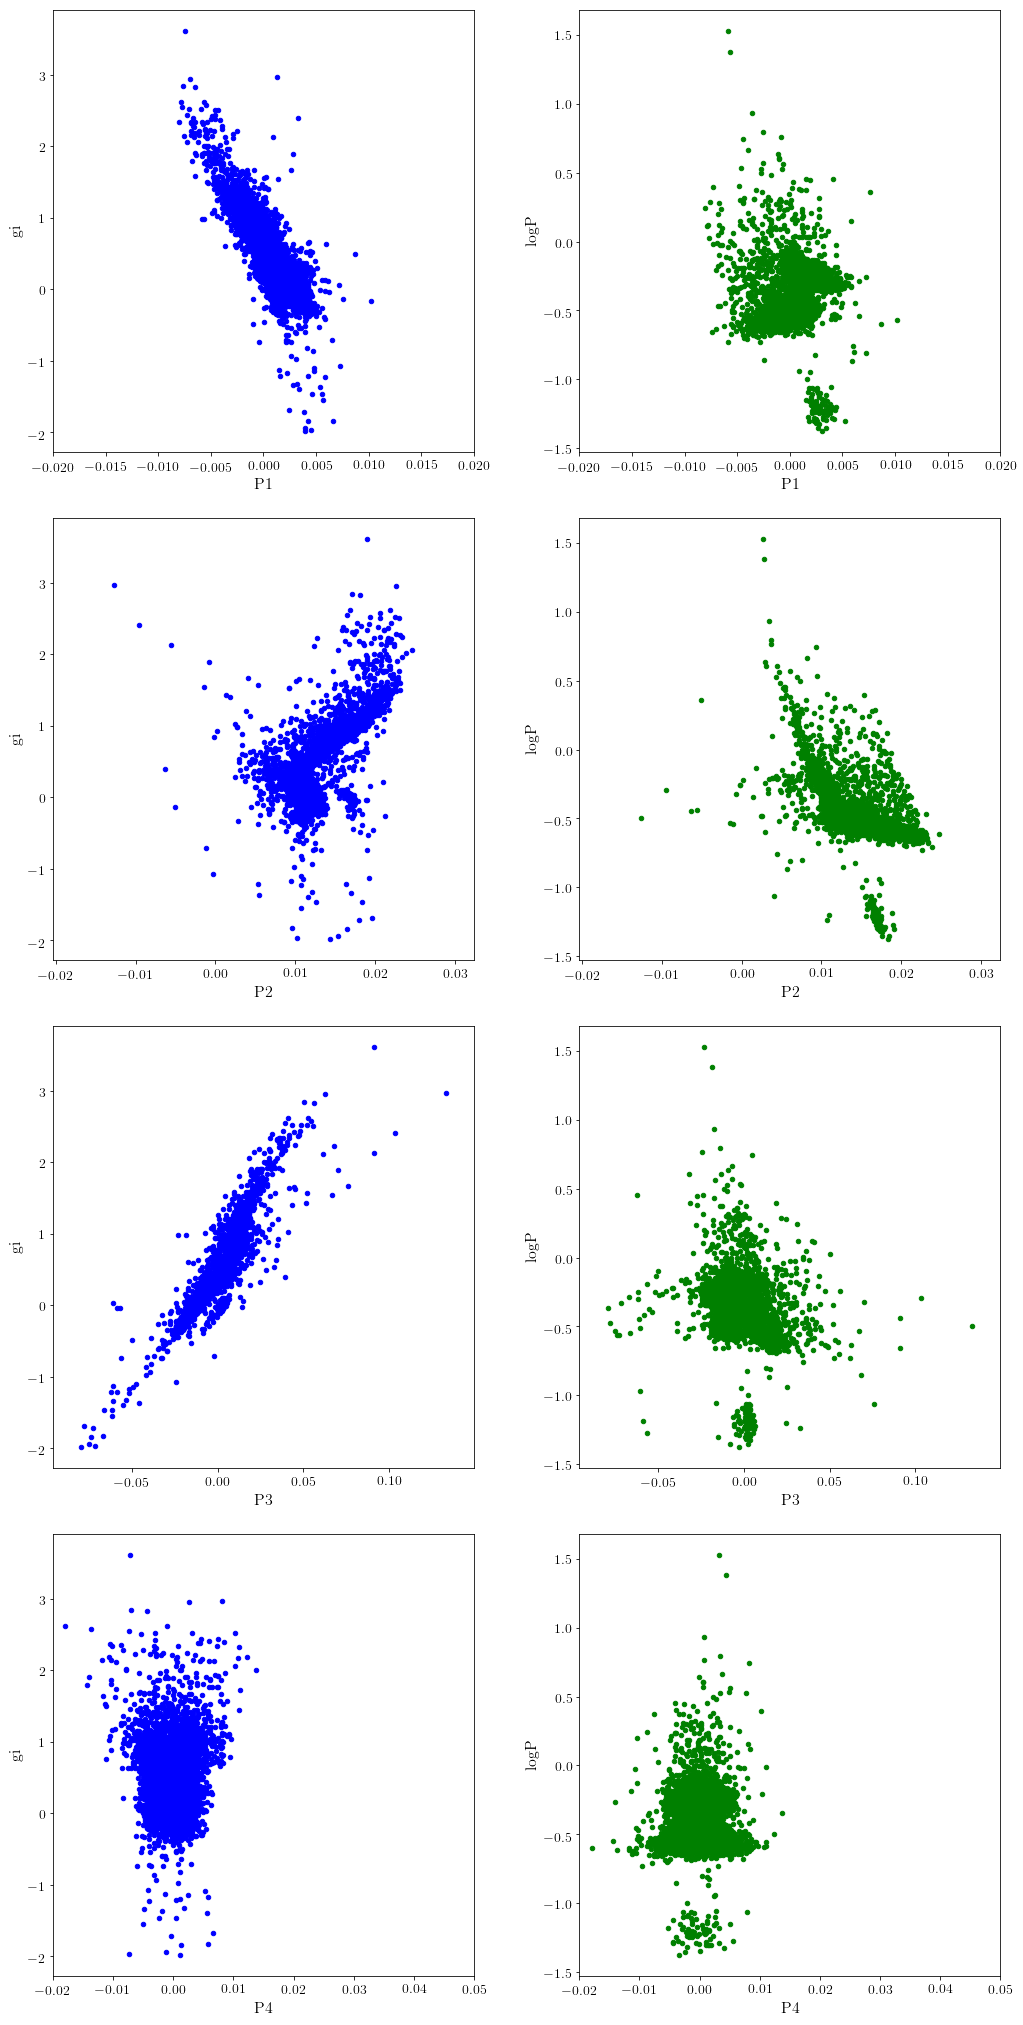

In [8]:
fig2,ax2=plt.subplots(4,2,figsize=(14,35))
fig2.subplots_adjust(bottom=0.1, top=0.88,
                    left=0.01, right=0.95,
                    hspace=0.15, wspace=0.25)
ax2[0,0].scatter(pca_comp[0], gi, s=20, color='blue')
ax2[0,1].scatter(pca_comp[0], logP, s=20, color='green')
ax2[1,0].scatter(pca_comp[1], gi, s=20, color='blue')
ax2[1,1].scatter(pca_comp[1], logP, s=20, color='green')
ax2[2,0].scatter(pca_comp[2], gi, s=20, color='blue')
ax2[2,1].scatter(pca_comp[2], logP, s=20, color='green')
ax2[3,0].scatter(pca_comp[3], gi, s=20, color='blue')
ax2[3,1].scatter(pca_comp[3], logP, s=20, color='green')
ax2[0,0].tick_params(axis='both', which='major', labelsize=14)
ax2[0,1].tick_params(axis='both', which='major', labelsize=14)
ax2[1,0].tick_params(axis='both', which='major', labelsize=14)
ax2[1,1].tick_params(axis='both', which='major', labelsize=14)
ax2[2,0].tick_params(axis='both', which='major', labelsize=14)
ax2[2,1].tick_params(axis='both', which='major', labelsize=14)
ax2[3,0].tick_params(axis='both', which='major', labelsize=14)
ax2[3,1].tick_params(axis='both', which='major', labelsize=14)
ax2[0,0].set_xlabel("P1",fontsize=16)
ax2[0,0].set_ylabel("gi",fontsize=16)
ax2[0,1].set_xlabel("P1",fontsize=16)
ax2[0,1].set_ylabel("logP",fontsize=16)
ax2[1,0].set_xlabel("P2",fontsize=16)
ax2[1,0].set_ylabel("gi",fontsize=16)
ax2[1,1].set_xlabel("P2",fontsize=16)
ax2[1,1].set_ylabel("logP",fontsize=16)
ax2[2,0].set_xlabel("P3",fontsize=16)
ax2[2,0].set_ylabel("gi",fontsize=16)
ax2[2,1].set_xlabel("P3",fontsize=16)
ax2[2,1].set_ylabel("logP",fontsize=16)
ax2[3,0].set_xlabel("P4",fontsize=16)
ax2[3,0].set_ylabel("gi",fontsize=16)
ax2[3,1].set_xlabel("P4",fontsize=16)
ax2[3,1].set_ylabel("logP",fontsize=16)
ax2[0,0].set_xlim(-0.02,0.02)
ax2[0,1].set_xlim(-0.02,0.02)
ax2[3,0].set_xlim(-0.02,0.05)
ax2[3,1].set_xlim(-0.02,0.05)

From the diagrams above we can see that there is strong corerlation between P1 and gi and P2 and gi. For both diagrams for P1 component redundancy is noticeably lower, and for all other diagrams redundancy we can assume almost no correlation between principal component values and gi and logP. We can also see that there is no dependence of gi and logP on P3 (increase/decrease in gi and logP is not followed by changes in P3 that remains constant around its mean value that is approximately zero).

## Problem 2

These age and color data for asteroid families are taken
from the paper Jedicke et al. (2004, Nature 429, 275), see fig. 1 in http://www.astro.washington.edu/users/ivezic/Publications/jedicke.pdf

In [9]:
# Age is measured in 10^6 yrs (Myr)
# Log10(age) and error (of Log(Age))
logAge = np.asarray([3.398, 2.477, 3.398, 3.477, 3.301, 1.699, 2.699, 0.763,
         2.301, 3.079,  3.176, 0.398])
LageErr = np.asarray([0.087, 0.145, 0.174, 0.145, 0.109, 0.347, 0.174, 0.015,
          0.217, 0.145, 0.145, 0.434])
# SDSS principal asteroid color PC1 and its error (per family)
PC1 = np.asarray([0.620, 0.476, 0.523, 0.582, 0.460, 0.479, 0.432, 0.351, 
       0.427, 0.522, 0.532, 0.311])
PC1err = np.asarray([0.005, 0.015, 0.007, 0.011, 0.005, 0.032, 0.033, 0.047,
        0.021, 0.015, 0.022, 0.027])
# time/age on linear axes
age = 10**logAge
# and standard error propagation (although errors can be large)
ageErr = age * LageErr * np.log(10)

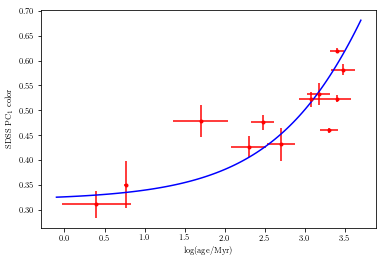

In [10]:
# let's take a quick look at the data to verify that it looks
# similar to fig. 1 from Jedicke et al. 
logT = np.linspace(-0.1, 3.7, 100)
time = np.power(10,logT)
# the best fit from Jedicke et al. 
color = 0.32 + 1.0*(1-np.exp(-(time/2.5e4)**0.5))
ax = plt.figure().add_subplot(111)
ax.set_xlabel("log(age/Myr)")
ax.set_ylabel("SDSS PC$_1$ color")
ax.plot(logT,color, c='blue')
ax.errorbar(logAge,PC1,xerr=LageErr, yerr=PC1err, color='r', 
             marker='.', ls='None', label='Observed')
plt.show() 

In [11]:
def get_m_b(beta):
    b = np.dot(beta, beta) / beta[1]
    m = -beta[0] / beta[1]
    return m, b


def get_beta(m, b):
    denom = (1 + m * m)
    return np.array([-b * m / denom, b / denom])


# compute the ellipse principal axes and rotation from covariance
def get_principal(sigma_x, sigma_y, rho_xy):
    sigma_xy2 = rho_xy * sigma_x * sigma_y

    alpha = 0.5 * np.arctan2(2 * sigma_xy2,
                             (sigma_x ** 2 - sigma_y ** 2))
    tmp1 = 0.5 * (sigma_x ** 2 + sigma_y ** 2)
    tmp2 = np.sqrt(0.25 * (sigma_x ** 2 - sigma_y ** 2) ** 2 + sigma_xy2 ** 2)

    return np.sqrt(tmp1 + tmp2), np.sqrt(tmp1 - tmp2), alpha


# plot ellipses
def plot_ellipses(x, y, sigma_x, sigma_y, rho_xy, factor=2, ax=None):
    if ax is None:
        ax = plt.gca()

    sigma1, sigma2, alpha = get_principal(sigma_x, sigma_y, rho_xy)

    for i in range(len(x)):
        ax.add_patch(Ellipse((x[i], y[i]),
                             factor * sigma1[i], factor * sigma2[i],
                             alpha[i] * 180. / np.pi,
                             fc='none', ec='k'))
        
# Find best-fit parameters
def get_best_fit(x, y, sigma_x, sigma_y, rho_xy):
    X = np.vstack((x, y)).T
    dX = np.zeros((len(x), 2, 2))
    dX[:, 0, 0] = sigma_x ** 2
    dX[:, 1, 1] = sigma_y ** 2
    dX[:, 0, 1] = dX[:, 1, 0] = rho_xy * sigma_x * sigma_y

    # note: TLS_logL was imported from astroML.linear_model 
    min_func = lambda beta: -TLS_logL(beta, X, dX)
    # this is optimization, not MCMC
    return optimize.fmin(min_func, x0=[-1, 1])

rho=0
best_fit3 = get_best_fit(age, PC1, ageErr, PC1err,rho) 
m_fit3, b_fit3 = get_m_b(best_fit3)
print('m=', m_fit3)
print('b=', b_fit3)

Optimization terminated successfully.
         Current function value: -10.887502
         Iterations: 89
         Function evaluations: 164
m= 7.1495046844e-05
b= 0.411743430505


In [12]:
def doMCMCexponent(xObs, yObs, xErr, yErr, doXerror = False, nChain = 10000, nBurn = 2000): 
    def model(xObs, yObs, xErr, yErr, doXerror): 
        a = pymc.Uniform('a', -1000, 1000, value= 1.0)
        b = pymc.Uniform('b', -1000, 1000, value= 0.0)
        c = pymc.Uniform('c', -1000, 1000, value= 0.0)
        d = pymc.Uniform('d', -1000, 1000, value= 0.0)

        if (doXerror):
            xLatent = pymc.Normal('x', mu=xObs, tau=(xErr)**-2)  
        else:
            xLatent = xObs 
        
        @pymc.deterministic()
        def exponent(x=xLatent, a=a, b=b, c=c, d=d):
            return a + b*(1-np.exp(-(x/c)**d))
    
        y = pymc.Normal('y', mu=exponent, tau=(yErr)**-2, value=yObs, observed=True)
        return locals()

    myModel = pymc.MCMC(model(xObs,yObs, xErr, yErr, doXerror))
    myModel.sample(nChain, nBurn, 1)
    traces = [myModel.trace(s)[:] for s in ['a', 'b', 'c', 'd']]
    M = pymc.MAP(myModel)
    M.fit()
    fit_vals = (M.a.value, M.b.value, M.c.value, M.d.value)
    return traces, fit_vals

In [13]:
traces, fit_vals =  doMCMCexponent(age,PC1, ageErr, PC1err, True, 200000, 20000)

/home/olena/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/home/olena/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in power
  from ipykernel import kernelapp as app


 [-----------------100%-----------------] 200000 of 200000 complete in 53.2 sec

(0.0, 1.0, 0.0, 1.0)

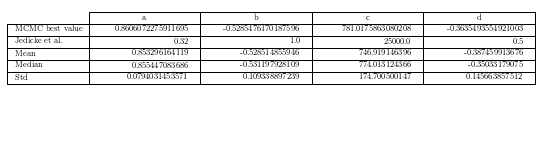

In [14]:
columns = ('a', 'b', 'c', 'd')
rows = ['MCMC best value', 'Jedicke et al.','Mean', 'Median', 'Std']
data_list = [[fit_vals[0],fit_vals[1],fit_vals[2],fit_vals[3]],[0.32,1.0,2.5e4,0.5],
             [np.mean(traces[0]),np.mean(traces[1]),np.mean(traces[2]),
                             np.mean(traces[3])],[np.median(traces[0]),np.median(traces[1]),
                             np.median(traces[2]),np.median(traces[3])],
             [np.std(traces[0]),np.std(traces[1]),np.std(traces[2]),np.std(traces[3])]]
fig,ax = plt.subplots(figsize=(8,2))
#Table - Main table
ax.table(cellText=data_list,
          rowLabels=rows,
          colLabels=columns, loc="upper center")
ax.axis("off")

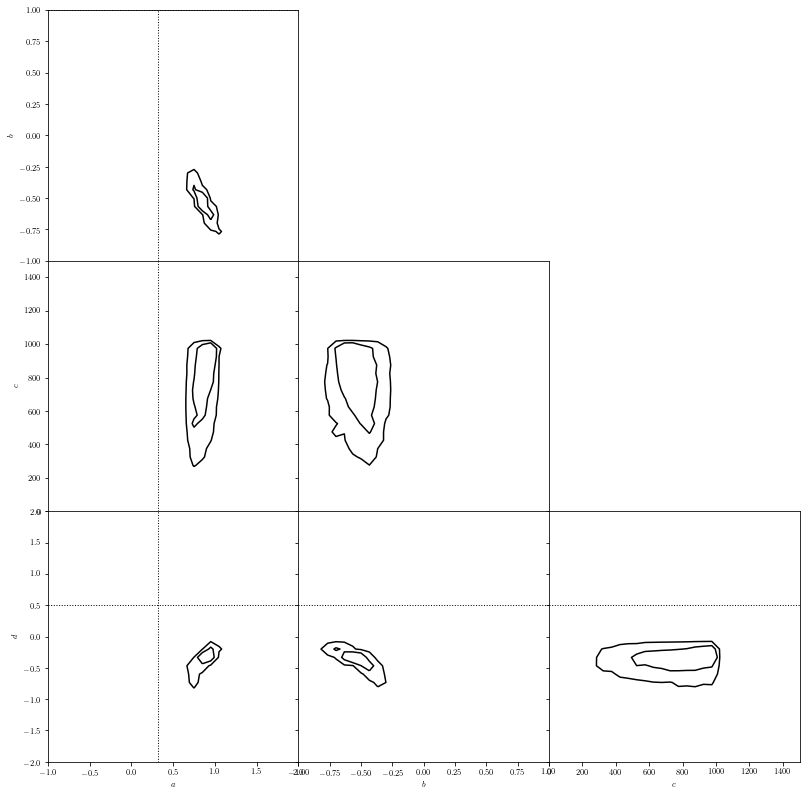

In [15]:
#as the 'true' values here values from Jedicke et al. are taken
from astroML.plotting.mcmc import plot_mcmc
labels = ['$a$', '$b$', '$c$','$d$']
limits = [(-1, 2), (-1, 1), (0, 1500),(-2, 2)]
TLS = [0.32, 1.0, 2.5e4, 0.5]
 
fig = plt.figure(figsize=(12, 12))
fig.subplots_adjust(bottom=0.3, top=0.8, left=0.15, right=0.9,
                    hspace=0.15, wspace=0.15)

# This function plots multiple panels with the traces
plot_mcmc(traces, labels=labels, limits=limits, true_values=TLS, fig=fig,
          bins=30, colors='k')

plt.show()

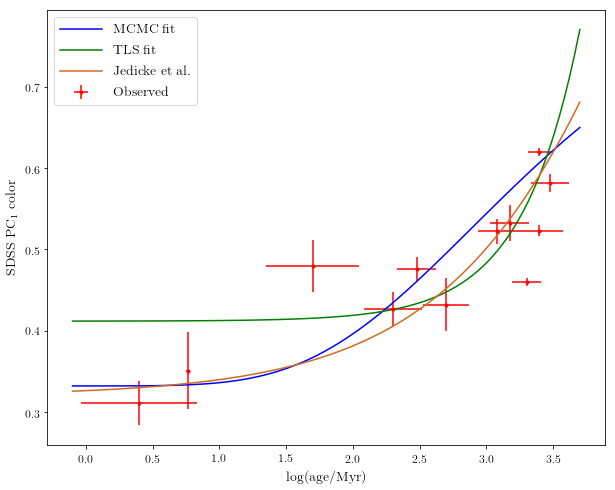

In [16]:
logT = np.linspace(-0.1, 3.7, 100)
age1 = np.power(10,logT)
fig  = plt.figure(figsize=(10,8))
yfitMCMC = fit_vals[0] + fit_vals[1]*(1-np.exp(-(age1/fit_vals[2])**fit_vals[3]))
yfitTLS = b_fit3 + m_fit3 * age1
plt.plot(logT,yfitMCMC,'-', c='blue', label='MCMC fit')
plt.plot(logT,yfitTLS,'-', c='green', label='TLS fit')
plt.plot(logT,color, c='chocolate',label='Jedicke et al.')
plt.errorbar(logAge,PC1,xerr=LageErr, yerr=PC1err, color='r', marker='.', ls='None', label='Observed')
plt.xlabel("log(age/Myr)",fontsize=14)
plt.ylabel("SDSS PC$_1$ color",fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(fontsize=14)
plt.show()

Best fit values obtained here for a, b, c, d parameters in the model function $ y(x) = a + b*\left[1-exp\left(-(x/c)^d\right)\right]$ differ significantly from the best fit values from Jedicke et al., as is given in the table above. From the сorresponding plot we can wee that this MCMC fit (blu line) values result in less perfect fit since it lies beyond the uncertainty limits for many points, which, however, can still be considered as satisfactory model. The plot with best-fit values derived from TLS can fit relatively well points with higher age values, but not data points corresponding to the lower age values.

In [17]:
#setting all errors to 1000
ageErr_new=np.array([0.001] * 12)
traces_new, fit_vals_new =  doMCMCexponent(age, PC1, ageErr_new, PC1err, True, 200000, 20000)
best_fit_new = get_best_fit(age, PC1, ageErr_new, PC1err,rho) 
m_fit_new, b_fit_new = get_m_b(best_fit_new)
print('m=', m_fit_new)
print('b=', b_fit_new)

/home/olena/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/home/olena/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in power
  from ipykernel import kernelapp as app


 [-----------------100%-----------------] 200000 of 200000 complete in 54.0 secOptimization terminated successfully.
         Current function value: 159.788914
         Iterations: 82
         Function evaluations: 155
m= 6.88621697796e-05
b= 0.384379772228


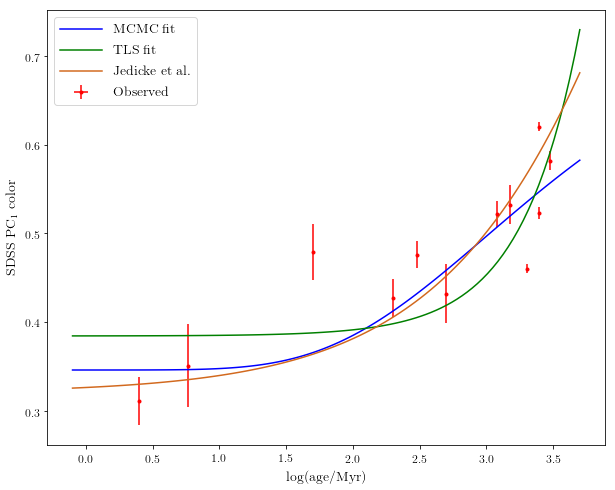

In [18]:
fig_new  = plt.figure(figsize=(10,8))
yfitMCMC_new = fit_vals_new[0] + fit_vals_new[1]*(1-np.exp(-(age1/fit_vals_new[2])**fit_vals_new[3]))
yfitTLS_new = b_fit_new + m_fit_new * age1
plt.plot(logT,yfitMCMC_new,'-', c='blue', label='MCMC fit')
plt.plot(logT,yfitTLS_new,'-', c='green', label='TLS fit')
plt.plot(logT,color, c='chocolate',label='Jedicke et al.')
plt.errorbar(logAge,PC1,xerr=ageErr_new/(age*np.log(10)), yerr=PC1err, color='r', marker='.', ls='None', label='Observed')
plt.xlabel("log(age/Myr)",fontsize=14)
plt.ylabel("SDSS PC$_1$ color",fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(fontsize=14)
plt.show()